In [ ]:
from google.colab import drive   
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
models_accuracy={}
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
import pickle

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/MBTI/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not t...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...


# Data Cleaning

In [ ]:
# Function To replace "|||" from text with " " Join all texts written by 1 Person 
def replace_sep(text):
    """Remove '|||' which is used as seprator """
    text = text.replace("|||"," ")
    return text
  
# Function To remove Links from text and replace them with 'Link' 
def remove_link(text):
    """Replace Links from text to 'Link' """
    #text = re.sub(r"http\S+", "Link", text, flags=re.MULTILINE)
    text = re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',text)
    return text

# Function To Remove punctuation from Text 
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# function for removing other symbols
def remove_symbols(text):
    text = re.sub('[^0-9a-z]',' ',text)
    return text
    

In [ ]:
def pre_processing_stage_1(text):
    text = replace_sep(text)  # Calling Function to remove "|||" seprator and join all texts 
    text = remove_link(text) # calling function to removes Links 
   # text = remove_symbols(text) # calling function to remove symbols
    text = text.lower()     # To convert whole text To lower
    return text

def Clean_Data1(df):
    print("PreProcessing----------- ")
    for i in tqdm(range(df.shape[0])):
        text = df.iloc[i][1]                      # Getting data from DataFrame to Text varibale to Preprocess
        text = pre_processing_stage_1(text)       # calling Function to merge texts and Do 1st level pre-processing          
        df.at[i,'posts'] =text
    return df

In [ ]:
data_MBTI_Clean = Clean_Data1(data)

PreProcessing----------- 


100%|██████████| 8675/8675 [00:01<00:00, 5345.13it/s]


In [ ]:
import pandas as pd
import numpy as np

#df = pd.read_csv('../input/mbti-type/mbti_1.csv')
data_MBTI_Clean['split'] = np.random.randn(data_MBTI_Clean.shape[0], 1)

msk = np.random.rand(len(data_MBTI_Clean)) <= 0.7

train = data_MBTI_Clean[msk]
test = data_MBTI_Clean[~msk]

In [ ]:
train.shape

(6122, 3)

In [ ]:
test.shape

(2553, 3)

In [ ]:
train.head()

,type,posts,split
0,INFJ,' enfp and intj moments sportscenter not top ten plays pranks what has been the most life-changing experience in your life? on repeat for most of today. may the perc experience i...,0.066790
1,ENTP,'i'm finding the lack of me in these posts very alarming. sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to cr...,1.471180
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created... dear e...",-1.732081
4,ENTJ,'you're fired. that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached w...,-0.397497
6,INFJ,"'no, i can't draw on my own nails (haha). those were done by professionals on my nails. and yes, those are all gel. you mean those you posted were done by yourself on your own nails? awesome! pro...",-1.005515


In [ ]:
train["type"].value_counts()

INFP    1331
INFJ    1020
INTP     914
INTJ     769
ENFP     482
ENTP     479
ISTP     250
ISFP     186
ENTJ     163
ENFJ     136
ISTJ     136
ISFJ     110
ESTP      59
ESFP      35
ESTJ      28
ESFJ      24
Name: type, dtype: int64

In [ ]:
test["type"].value_counts()

INFP    501
INFJ    450
INTP    390
INTJ    322
ENTP    206
ENFP    193
ISTP     87
ISFP     85
ISTJ     69
ENTJ     68
ISFJ     56
ENFJ     54
ESTP     30
ESFJ     18
ESFP     13
ESTJ     11
Name: type, dtype: int64

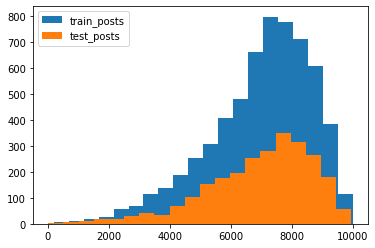

In [ ]:
length_train = train['posts'].str.len()
length_test = test['posts'].str.len()

plt.hist(length_train, bins=20, label="train_posts")
plt.hist(length_test, bins=20, label="test_posts")
plt.legend()
plt.show()

In [ ]:
combi = train.append(test, ignore_index=True)
combi.shape

(8675, 3)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [ ]:
combi['tidy_posts'] = np.vectorize(remove_pattern)(combi['posts'], "@[\w]*") 
combi.head()

,type,posts,split,tidy_posts
0,INFJ,' enfp and intj moments sportscenter not top ten plays pranks what has been the most life-changing experience in your life? on repeat for most of today. may the perc experience i...,0.066790,' enfp and intj moments sportscenter not top ten plays pranks what has been the most life-changing experience in your life? on repeat for most of today. may the perc experience i...
1,ENTP,'i'm finding the lack of me in these posts very alarming. sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to cr...,1.471180,'i'm finding the lack of me in these posts very alarming. sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to cr...
2,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created... dear e...",-1.732081,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created... dear e..."
3,ENTJ,'you're fired. that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached w...,-0.397497,'you're fired. that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached w...
4,INFJ,"'no, i can't draw on my own nails (haha). those were done by professionals on my nails. and yes, those are all gel. you mean those you posted were done by yourself on your own nails? awesome! pro...",-1.005515,"'no, i can't draw on my own nails (haha). those were done by professionals on my nails. and yes, those are all gel. you mean those you posted were done by yourself on your own nails? awesome! pro..."


In [ ]:
combi['tidy_posts'] = combi['tidy_posts'].str.replace("[^a-zA-Z#]", " ", regex=True)
combi.head(10)

,type,posts,split,tidy_posts
0,INFJ,' enfp and intj moments sportscenter not top ten plays pranks what has been the most life-changing experience in your life? on repeat for most of today. may the perc experience i...,0.066790,enfp and intj moments sportscenter not top ten plays pranks what has been the most life changing experience in your life on repeat for most of today may the perc experience i...
1,ENTP,'i'm finding the lack of me in these posts very alarming. sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to cr...,1.471180,i m finding the lack of me in these posts very alarming sex can be boring if it s in the same position often for example me and my girlfriend are currently in an environment where we have to cr...
2,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created... dear e...",-1.732081,dear intp i enjoyed our conversation the other day esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created dear e...
3,ENTJ,'you're fired. that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached w...,-0.397497,you re fired that s another silly misconception that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to nobody wants to be approached w...
4,INFJ,"'no, i can't draw on my own nails (haha). those were done by professionals on my nails. and yes, those are all gel. you mean those you posted were done by yourself on your own nails? awesome! pro...",-1.005515,no i can t draw on my own nails haha those were done by professionals on my nails and yes those are all gel you mean those you posted were done by yourself on your own nails awesome pro...
5,INTJ,'i tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called 'everything' from there it get sorted into type and sub type i ike to collec...,-1.797192,i tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called everything from there it get sorted into type and sub type i ike to collec...
6,INFJ,"i'm not sure, that's a good question. the distinction between the two is so dependant on perception. to quote robb flynn, ''the hate you feel is nothing more, than love you feel to win this war.''...",-0.821803,i m not sure that s a good question the distinction between the two is so dependant on perception to quote robb flynn the hate you feel is nothing more than love you feel to win this war ...
7,INTP,"' i'm in this position where i have to actually let go of the person, due to a various reasons. unfortunately i'm having trouble mustering enough strength to actually pull through it. sometimes,....",0.509631,i m in this position where i have to actually let go of the person due to a various reasons unfortunately i m having trouble mustering enough strength to actually pull through it sometimes ...
8,INFJ,'one time my parents were fighting over my dad's affair and my dad pushed my mom. the fall broke her finger. she's pointed a gun at him and made him get on his knees and beg for his life. she's.....,0.801044,one time my parents were fighting over my dad s affair and my dad pushed my mom the fall broke her finger she s pointed a gun at him and made him get on his knees and beg for his life she s ...
9,ENFJ,' 51 :o i went through a break up some months ago. we were together for 4 years and i had planned my life around that relationship. i wasn't the one breaking the relationship as you might imagine...,1.159799,o i went through a break up some months ago we were together for years and i had planned my life around

In [ ]:
combi['clean_text'] = combi['tidy_posts'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
combi.head()

,type,posts,split,tidy_posts,clean_text
0,INFJ,' enfp and intj moments sportscenter not top ten plays pranks what has been the most life-changing experience in your life? on repeat for most of today. may the perc experience i...,-1.151811,enfp and intj moments sportscenter not top ten plays pranks what has been the most life changing experience in your life on repeat for most of today may the perc experience i...,enfp and intj moments sportscenter not top ten plays pranks what has been the most life changing experience your life repeat for most today may the perc experience immerse you the last thing infj ...
1,ENTP,'i'm finding the lack of me in these posts very alarming. sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to cr...,-0.376888,i m finding the lack of me in these posts very alarming sex can be boring if it s in the same position often for example me and my girlfriend are currently in an environment where we have to cr...,finding the lack these posts very alarming sex can boring the same position often for example and girlfriend are currently environment where have creatively use cowgirl and missionary there isn en...
2,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created... dear e...",-0.620051,dear intp i enjoyed our conversation the other day esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created dear e...,dear intp enjoyed our conversation the other day esoteric gabbing about the nature the universe and the idea that every rule and social code being arbitrary constructs created dear entj sub long t...
3,ENTJ,'you're fired. that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached w...,-1.033311,you re fired that s another silly misconception that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to nobody wants to be approached w...,you fired that another silly misconception that approaching logically going the key unlocking whatever you think you are entitled nobody wants approached with but guys really wants super duper lon...
4,INTJ,"'18/37 @.@ science is not perfect. no scientist claims that it is, or that scientific information will not be revised as we discover new things. rational thinking has been very useful to our s...",-0.863966,science is not perfect no scientist claims that it is or that scientific information will not be revised as we discover new things rational thinking has been very useful to our soc...,science not perfect scientist claims that that scientific information will not revised discover new things rational thinking has been very useful our society infp edgar allen poe was infp and your...


In [ ]:
MBTI_TO_FREQUENCY_DICT = {
    "ISTJ": 0.11,
    "ISFJ": 0.09,
    "INFJ": 0.04,
    "INTJ": 0.05,
    "ISTP": 0.05,
    "ISFP": 0.05,
    "INFP": 0.06,
    "INTP": 0.06,
    "ESTP": 0.04,
    "ESFP": 0.04,
    "ENFP": 0.08,
    "ENTP": 0.06,
    "ESTJ": 0.08,
    "ESFJ": 0.09,
    "ENFJ": 0.05,
    "ENTJ": 0.05,
}
import collections

In [ ]:
counts = collections.defaultdict(int)
for mbti in combi["type"]:
    counts[mbti] += 1

In [ ]:
limiting_type = None
min_size = float("infinity")
for mbti in counts.keys():
    size = counts[mbti] / MBTI_TO_FREQUENCY_DICT[mbti]
    if size < min_size:
        min_size = size
        limiting_type = mbti

In [ ]:
dic = collections.defaultdict(list)
for index, row in data_MBTI_Clean.iterrows():
    dic[row["type"]].append(row)

In [ ]:
DATA_DIR = "data"
#MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_1.csv")
#MBTI_CLEAN_CSV_PATH = os.path.join(DATA_DIR, "mbti_clean.csv")
#MBTI_UNCLEAN_CSV_PATH = os.path.join(DATA_DIR, "mbti_unclean.csv")

MBTI_CLEAN_CSV_PATH = "mbti_clean.csv"
MBTI_UNCLEAN_CSV_PATH = "mbti_unclean.csv"

In [ ]:
#MBTI_CLEAN_CSV_PATH = "/content/drive/MyDrive/MBTI/"

In [ ]:
import csv

In [ ]:
unclean_list = []
with open(MBTI_CLEAN_CSV_PATH, "w") as f:
    writer = csv.writer(f)
    writer.writerow(["type", "posts"])

    for mbti in MBTI_TO_FREQUENCY_DICT.keys():
        list1 = dic[mbti]
        for x in range(0, int(round(min_size * MBTI_TO_FREQUENCY_DICT[mbti]))):
            writer.writerow(list1[x])
        unclean_list.append(
            list1[int(round(min_size * MBTI_TO_FREQUENCY_DICT[mbti])) : len(list1)]
        )

In [ ]:
# This Function Will be used to make data equal for all Class 
def up_down_sampling(data,count):
    types = list(set(data.type))
    defined = False
    for tp in types :
        print(tp)
        if not defined:
            defined = True
            tp_class_count = data.type.value_counts()[tp]
            if tp_class_count > count :
                df = data[data['type'] == tp].sample(count)
            else:
                df = data[data['type'] == tp].sample(count,replace = True)
        else:
            tp_class_count = data.type.value_counts()[tp]
            if tp_class_count > count :
                df = pd.concat([df, data[data['type'] == tp].sample(count)], axis=0)
            else:
                df = pd.concat([df, data[data['type'] == tp].sample(count,replace = True)], axis=0)
    return df

In [ ]:
# Using Up_down Sampling for preparing trainable data   
#combi = up_down_sampling(combi,2000)

In [ ]:
# Checking Trainable data 
count_class = combi.type.value_counts()
count_class

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
# Checking Trainable data 
count_class = combi.type.value_counts()
count_class

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
#Suffling DataFrame 
combi = combi.sample(frac = 1)

# Tokenization and Embedding

In [ ]:
tokenized_text = combi['clean_text'].apply(lambda x: x.split()) # tokenizing

In [ ]:
tokenized_text.head()

0    [enfp, and, intj, moments, sportscenter, not, top, ten, plays, pranks, what, has, been, the, most, life, changing, experience, your, life, repeat, for, most, today, may, the, perc, experience, imm...
1    [finding, the, lack, these, posts, very, alarming, sex, can, boring, the, same, position, often, for, example, and, girlfriend, are, currently, environment, where, have, creatively, use, cowgirl, ...
2    [dear, intp, enjoyed, our, conversation, the, other, day, esoteric, gabbing, about, the, nature, the, universe, and, the, idea, that, every, rule, and, social, code, being, arbitrary, constructs, ...
3    [you, fired, that, another, silly, misconception, that, approaching, logically, going, the, key, unlocking, whatever, you, think, you, are, entitled, nobody, wants, approached, with, but, guys, re...
4    [can, draw, own, nails, haha, those, were, done, professionals, nails, and, yes, those, are, all, gel, you, mean, those, you, posted, were, done, yourself, your, own, nails, a

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
tokenized_text.size

8675

In [ ]:
for i in range(0, len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
    #tokenized_text[i] = ' '.join(str(v) for v in tokenized_text[i])
    #print(i)
    
combi['clean_text'] = tokenized_text

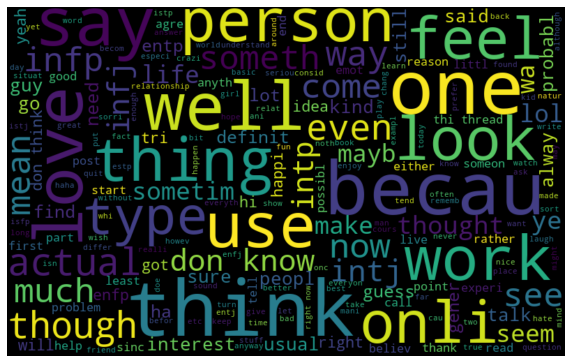

In [ ]:
all_words = ' '.join([text for text in combi['clean_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

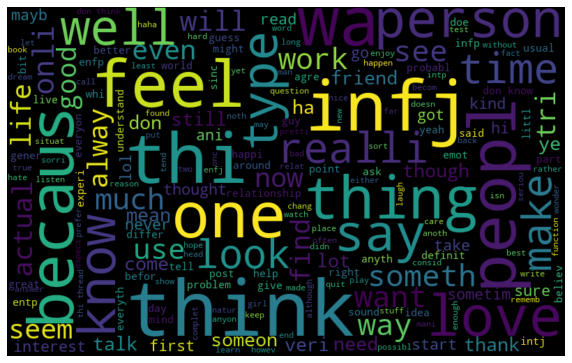

In [ ]:
normal_words =' '.join([text for text in combi['clean_text'][combi['type'] == 'INFJ']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Extracting Features from Cleaned texts**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

**Bag-of-Words Features**

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['clean_text'])
bow.shape

(8675, 1000)

**TF-IDF Features**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['clean_text'])
tfidf.shape

(8675, 1000)

**Word Embeddings**

**1. Word2Vec Embeddings**

In [ ]:
tokenized_text = combi['clean_text'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
    tokenized_text,
    size=1000, # desired no. of features/independent variables 
    #vector_size=1000, # desired no. of features/independent variables 
    window=5, # context window size
    min_count=2,
    sg = 1, # 1 for skip-gram model
    hs = 0,
    negative = 10, # for negative sampling
    workers= 2, # no.of cores
    seed = 34)

model_w2v.train(tokenized_text, total_examples= len(combi['clean_text']), epochs=10)

(64674461, 80589920)

Preparing Vectors for texts

We will use the below function to create a vector for each text by taking the average of the vectors of the words present in the text.

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                        
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_text), 1000))

for i in range(len(tokenized_text)):
    wordvec_arrays[i,:] = word_vector(tokenized_text[i], 1000)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(8675, 1000)

In [ ]:
# save 
#pickle_out = open("/content/drive/MyDrive/MBTI/w2v_df/w2v_df_2021.pickle","wb")
#pickle.dump(wordvec_df, pickle_out)
#pickle_out.close()
#/content/drive/MyDrive/MBTI/w2v_df/w2v_df_2021.pickle
# load elmo_train_new
#pickle_in = open("/content/drive/MyDrive/MBTI/w2v_df/w2v_df_2021.pickle", "rb")
#wordvec_df_new = pickle.load(pickle_in)

In [ ]:
#wordvec_df_new.shape

(8675, 1000)

Model Building
We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors. We will use the following algorithms to build models:

Logistic Regression
Support Vector Machine
XGBoost

# 1. Logistic Regression

**Bag-of-Words Features**

In [ ]:
col_size = train['type'].size
print(col_size)

6122


In [ ]:
train_bow = bow[:col_size,:]
test_bow = bow[col_size:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['type'], random_state=42, test_size=0.3)

In [ ]:
target_encoder=LabelEncoder()
train_target_bow=target_encoder.fit_transform(ytrain)
val_target_bow=target_encoder.fit_transform(yvalid)
test_target_bow=target_encoder.fit_transform(test['type'])

In [ ]:
train_target_bow.shape

(4285,)

In [ ]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(xtrain_bow,train_target_bow)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('train classification report \n ',classification_report(train_target_bow,model_log.predict(xtrain_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('Val classification report \n',classification_report(val_target_bow,model_log.predict(xvalid_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_bow,model_log.predict(test_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00        89
        ENFP       1.00      1.00      1.00       318
        ENTJ       1.00      1.00      1.00       102
        ENTP       1.00      1.00      1.00       329
        ESFJ       1.00      1.00      1.00        17
        ESFP       1.00      1.00      1.00        21
        ESTJ       1.00      1.00      1.00        17
        ESTP       1.00      1.00      1.00        41
        INFJ       1.00      1.00      1.00       698
        INFP       1.00      1.00      1.00       961
        INTJ       1.00      1.00      1.00       548
        INTP       1.00      1.00      1.00       660
        ISFJ       1.00      1.00      1.00        68
        ISFP       1.00      1.00      1.00       138
        ISTJ       1.00      1.00      1.00        94
        ISTP       1.00      0.99      1.00       184

    accuracy                           1.00      

In [ ]:
models_accuracy['logistic regression']=accuracy_score(test_target_bow,model_log.predict(test_bow))

**TF-IDF Features**

In [ ]:
train_tfidf = tfidf[:col_size,:]
test_tfidf = tfidf[col_size:,:]
# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['type'], random_state=42, test_size=0.3)

In [ ]:
target_encoder=LabelEncoder()
train_target_tfidf=target_encoder.fit_transform(ytrain)
val_target_tfidf=target_encoder.fit_transform(yvalid)
test_target_tfidf=target_encoder.fit_transform(test['type'])

In [ ]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(xtrain_tfidf,train_target_tfidf)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('train classification report \n ',classification_report(train_target_tfidf,model_log.predict(xtrain_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('Val classification report \n',classification_report(val_target_tfidf,model_log.predict(xvalid_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_tfidf,model_log.predict(test_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.76      0.15      0.25        89
        ENFP       0.80      0.64      0.71       318
        ENTJ       0.89      0.24      0.37       102
        ENTP       0.79      0.66      0.72       329
        ESFJ       0.00      0.00      0.00        17
        ESFP       0.00      0.00      0.00        21
        ESTJ       0.00      0.00      0.00        17
        ESTP       1.00      0.05      0.09        41
        INFJ       0.76      0.79      0.77       698
        INFP       0.66      0.92      0.77       961
        INTJ       0.72      0.77      0.74       548
        INTP       0.70      0.85      0.77       660
        ISFJ       1.00      0.22      0.36        68
        ISFP       0.82      0.43      0.57       138
        ISTJ       0.93      0.29      0.44        94
        ISTP       0.84      0.63      0.72       184

    accuracy                           0.72      

In [ ]:
models_accuracy['logistic regression_TFIDF']=accuracy_score(test_target_tfidf,model_log.predict(test_tfidf))

**Word2Vec Features**

In [ ]:
wordvec_df_new.shape

(8675, 1000)

In [ ]:
train_w2v = wordvec_df_new.iloc[:col_size,:]
test_w2v = wordvec_df_new.iloc[col_size:,:]

# splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['type'], random_state=42, test_size=0.3)

In [ ]:
target_encoder=LabelEncoder()
train_target_w2v=target_encoder.fit_transform(ytrain)
val_target_w2v=target_encoder.fit_transform(yvalid)
test_target_w2v=target_encoder.fit_transform(test['type'])

In [ ]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(xtrain_w2v,train_target_w2v)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('train classification report \n ',classification_report(train_target_w2v,model_log.predict(xtrain_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('Val classification report \n',classification_report(val_target_w2v,model_log.predict(xvalid_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_w2v,model_log.predict(test_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        89
        ENFP       0.33      0.00      0.01       318
        ENTJ       0.00      0.00      0.00       102
        ENTP       0.40      0.01      0.02       329
        ESFJ       0.00      0.00      0.00        17
        ESFP       0.00      0.00      0.00        21
        ESTJ       0.00      0.00      0.00        17
        ESTP       0.00      0.00      0.00        41
        INFJ       0.37      0.21      0.27       698
        INFP       0.30      0.90      0.45       961
        INTJ       0.51      0.03      0.06       548
        INTP       0.36      0.49      0.41       660
        ISFJ       0.00      0.00      0.00        68
        ISFP       0.00      0.00      0.00       138
        ISTJ       0.00      0.00      0.00        94
        ISTP       0.00      0.00      0.00       184

    accuracy                           0.32      

In [ ]:
models_accuracy['logistic regression_w2v']=accuracy_score(test_target_w2v,model_log.predict(test_w2v))

# 2. Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC,LinearSVC

**BOW**

In [ ]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(xtrain_bow,train_target_bow)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print('train classification report \n ',classification_report(train_target_bow,model_linear_svc.predict(xtrain_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(val_target_bow,model_linear_svc.predict(xvalid_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_bow,model_linear_svc.predict(test_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.98      0.99        89
        ENFP       1.00      1.00      1.00       318
        ENTJ       1.00      1.00      1.00       102
        ENTP       1.00      1.00      1.00       329
        ESFJ       1.00      1.00      1.00        17
        ESFP       1.00      1.00      1.00        21
        ESTJ       1.00      1.00      1.00        17
        ESTP       1.00      1.00      1.00        41
        INFJ       0.99      0.99      0.99       698
        INFP       0.99      0.99      0.99       961
        INTJ       0.99      1.00      1.00       548
        INTP       0.99      1.00      0.99       660
        ISFJ       1.00      1.00      1.00        68
        ISFP       1.00      1.00      1.00       138
        ISTJ       1.00      1.00      1.00        94
        ISTP       0.99      0.99      0.99       184

    accuracy                           0.99      

In [ ]:
models_accuracy['Linear Support Vector classifier_BOW']=accuracy_score(test_target_bow,model_linear_svc.predict(test_bow))

**TFIDF**

In [ ]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(xtrain_tfidf,train_target_tfidf)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print('train classification report \n ',classification_report(train_target_tfidf,model_linear_svc.predict(xtrain_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(val_target_tfidf,model_linear_svc.predict(xvalid_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_tfidf,model_linear_svc.predict(test_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.82      0.35      0.49        89
        ENFP       0.82      0.74      0.78       318
        ENTJ       0.86      0.53      0.65       102
        ENTP       0.80      0.76      0.78       329
        ESFJ       0.86      0.35      0.50        17
        ESFP       1.00      0.10      0.17        21
        ESTJ       1.00      0.29      0.45        17
        ESTP       0.90      0.22      0.35        41
        INFJ       0.81      0.82      0.81       698
        INFP       0.75      0.91      0.83       961
        INTJ       0.78      0.80      0.79       548
        INTP       0.77      0.86      0.81       660
        ISFJ       0.88      0.44      0.59        68
        ISFP       0.84      0.64      0.72       138
        ISTJ       0.86      0.61      0.71        94
        ISTP       0.85      0.83      0.84       184

    accuracy                           0.79      

In [ ]:
models_accuracy['Linear Support Vector classifier_TFIDF']=accuracy_score(test_target_tfidf,model_linear_svc.predict(test_tfidf))

**W2V**

In [ ]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(xtrain_w2v,train_target_w2v)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print('train classification report \n ',classification_report(train_target_w2v,model_linear_svc.predict(xtrain_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(val_target_w2v,model_linear_svc.predict(xvalid_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_w2v,model_linear_svc.predict(test_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        89
        ENFP       0.33      0.02      0.03       318
        ENTJ       0.00      0.00      0.00       102
        ENTP       0.53      0.06      0.11       329
        ESFJ       0.00      0.00      0.00        17
        ESFP       0.00      0.00      0.00        21
        ESTJ       0.00      0.00      0.00        17
        ESTP       0.00      0.00      0.00        41
        INFJ       0.41      0.27      0.32       698
        INFP       0.34      0.90      0.49       961
        INTJ       0.51      0.15      0.23       548
        INTP       0.37      0.58      0.45       660
        ISFJ       0.00      0.00      0.00        68
        ISFP       0.50      0.01      0.01       138
        ISTJ       0.00      0.00      0.00        94
        ISTP       1.00      0.01      0.02       184

    accuracy                           0.36      

In [ ]:
models_accuracy['Linear Support Vector classifier_w2v']=accuracy_score(test_target_w2v,model_linear_svc.predict(test_w2v))

# 3. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

**BOW**

In [ ]:
model_xgb=XGBClassifier(gpu_id=1,tree_method='auto',max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(xtrain_bow,train_target_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

In [ ]:
print('train classification report \n ',classification_report(train_target_bow,model_xgb.predict(xtrain_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(val_target_bow,model_xgb.predict(xvalid_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_bow,model_xgb.predict(test_bow),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.91      0.95        89
        ENFP       0.99      0.97      0.98       318
        ENTJ       1.00      0.96      0.98       102
        ENTP       0.98      0.97      0.97       329
        ESFJ       1.00      0.94      0.97        17
        ESFP       1.00      0.95      0.98        21
        ESTJ       1.00      0.94      0.97        17
        ESTP       1.00      0.98      0.99        41
        INFJ       0.97      0.96      0.96       698
        INFP       0.93      0.96      0.95       961
        INTJ       0.96      0.94      0.95       548
        INTP       0.94      0.97      0.95       660
        ISFJ       1.00      0.96      0.98        68
        ISFP       0.99      0.96      0.97       138
        ISTJ       1.00      0.96      0.98        94
        ISTP       0.98      0.99      0.99       184

    accuracy                           0.96      

In [ ]:
models_accuracy['XGBoost Classifier_BOW']=accuracy_score(test_target_bow,model_xgb.predict(test_bow))

**TFIDF**

In [ ]:
model_xgb=XGBClassifier(gpu_id=1,tree_method='auto',max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(xtrain_tfidf,train_target_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

In [ ]:
print('train classification report \n ',classification_report(train_target_tfidf,model_xgb.predict(xtrain_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(val_target_tfidf,model_xgb.predict(xvalid_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_tfidf,model_xgb.predict(test_tfidf),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.98      0.99        89
        ENFP       0.99      0.99      0.99       318
        ENTJ       1.00      0.99      1.00       102
        ENTP       0.99      0.99      0.99       329
        ESFJ       1.00      1.00      1.00        17
        ESFP       1.00      1.00      1.00        21
        ESTJ       1.00      1.00      1.00        17
        ESTP       1.00      1.00      1.00        41
        INFJ       0.98      0.98      0.98       698
        INFP       0.97      0.98      0.98       961
        INTJ       0.98      0.98      0.98       548
        INTP       0.98      0.98      0.98       660
        ISFJ       1.00      0.99      0.99        68
        ISFP       1.00      0.99      0.99       138
        ISTJ       1.00      0.98      0.99        94
        ISTP       0.98      0.98      0.98       184

    accuracy                           0.98      

In [ ]:
models_accuracy['XGBoost Classifier_TFIDF']=accuracy_score(test_target_tfidf,model_xgb.predict(test_tfidf))

**w2v**

In [ ]:
model_xgb=XGBClassifier(gpu_id=1,tree_method='auto',max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(xtrain_w2v,train_target_w2v)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='auto', verbosity=1)

In [ ]:
print('train classification report \n ',classification_report(train_target_w2v,model_xgb.predict(xtrain_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(val_target_w2v,model_xgb.predict(xvalid_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target_w2v,model_xgb.predict(test_w2v),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00        89
        ENFP       1.00      0.99      1.00       318
        ENTJ       1.00      1.00      1.00       102
        ENTP       1.00      1.00      1.00       329
        ESFJ       1.00      1.00      1.00        17
        ESFP       1.00      1.00      1.00        21
        ESTJ       1.00      1.00      1.00        17
        ESTP       1.00      1.00      1.00        41
        INFJ       0.99      1.00      1.00       698
        INFP       0.99      1.00      1.00       961
        INTJ       1.00      1.00      1.00       548
        INTP       1.00      1.00      1.00       660
        ISFJ       1.00      1.00      1.00        68
        ISFP       1.00      1.00      1.00       138
        ISTJ       1.00      1.00      1.00        94
        ISTP       1.00      0.99      1.00       184

    accuracy                           1.00      

In [ ]:
models_accuracy['XGBoost Classifier_w2v']=accuracy_score(test_target_w2v,model_xgb.predict(test_w2v))

In [ ]:
prediction = model_xgb.predict(xvalid_w2v)


In [ ]:
print("F1 Score : ",f1_score(val_target_w2v, prediction, 
                                           pos_label='positive',
                                           average='micro'))

F1 Score :  0.3968426782798041


# Results of Classical Models

In [ ]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [ ]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,Linear Support Vector classifier_TFIDF,0.658441
1,XGBoost Classifier_BOW,0.646298
2,XGBoost Classifier_TFIDF,0.641990
3,logistic regression_TFIDF,0.630631
4,logistic regression,0.543282
5,Linear Support Vector classifier_BOW,0.479436
6,XGBoost Classifier_w2v,0.409322
7,Linear Support Vector classifier_w2v,0.320407
8,logistic regression_w2v,0.284371


# **BERT**

In [ ]:
import tensorflow as tf

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 64.5 MB/s 
     |████████████████████████████████| 3.3 MB 55.8 MB/s 
     |████████████████████████████████| 596 kB 81.1 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers
tokenizer_bert = transformers.AutoTokenizer.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
types = np.unique(combi.type.values)

In [ ]:
def get_type_index(string):
    return list(types).index(string)

In [ ]:
combi['type_index'] = combi['type'].apply(get_type_index)

In [ ]:
from sklearn.model_selection import train_test_split

train_b, test_bert = train_test_split(combi)
train_bert, val_bert = train_test_split(train_b)

In [ ]:
#Initialize Bert tokenizer and masks
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

bert_model_name = 'bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(bert_model_name, do_lower_case=True)
MAX_LEN = 1000

def tokenize_sentences(sentences, tokenizer, max_seq_len = 1800):
    tokenized_sentences = []

    for sentence in tqdm(sentences):
        tokenized_sentence = tokenizer.encode(
                            sentence,                  # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_seq_len,  # Truncate all sentences.
                    )
        
        tokenized_sentences.append(tokenized_sentence)
        
    return tokenized_sentences


train_input_ids = tokenize_sentences(train_bert['posts'], tokenizer, MAX_LEN)
train_input_ids = pad_sequences(train_input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

test_input_ids = tokenize_sentences(test_bert['posts'], tokenizer, MAX_LEN)
test_input_ids = pad_sequences(test_input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

val_input_ids = tokenize_sentences(val_bert['posts'], tokenizer, MAX_LEN)
val_input_ids = pad_sequences(val_input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1627/1627 [00:54<00:00, 29.62it/s]


In [ ]:
#maxlen = 1500
#train_input_ids = [tokenizer_bert.encode(str(i), max_length = maxlen ,truncation=True, pad_to_max_length = True) for i in train_bert.clean_text.values]
#val_input_ids = [tokenizer_bert.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in val_bert.clean_text.values]

In [ ]:
len(train_input_ids)

4879

In [ ]:
from tensorflow.keras import backend as K
#Define f1 functions for evaluation
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
BATCH_SIZE=8 
NR_EPOCHS=10
maxlen=1000

In [ ]:
def create_model(): 
    input_word_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32,
                                           name="input_word_ids")
    bert_layer = transformers.TFBertModel.from_pretrained('bert-large-uncased')
    bert_outputs = bert_layer(input_word_ids)[0]
    pred = tf.keras.layers.Dense(16, activation='softmax')(bert_outputs[:,0,:])
    
    model = tf.keras.models.Model(inputs=input_word_ids, outputs=pred)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                  metrics=['accuracy', f1_m, precision_m, recall_m])
    return model

In [ ]:
# force TF to 2.2
!pip install -q tensorflow~=2.2.0 tensorflow_gcs_config~=2.2.0
import tensorflow as tf
import requests
import os
resp = requests.post("http://{}:8475/requestversion/{}".format(os.environ["COLAB_TPU_ADDR"].split(":")[0], tf.__version__))
if resp.status_code != 200:
  print("Failed to switch the TPU to TF {}".format(version))

     |████████████████████████████████| 516.4 MB 13 kB/s 
     |████████████████████████████████| 392 kB 76.6 MB/s 
     |████████████████████████████████| 454 kB 80.4 MB/s 
     |████████████████████████████████| 20.1 MB 351 kB/s 
     |████████████████████████████████| 2.9 MB 63.7 MB/s 
     |████████████████████████████████| 3.0 MB 64.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.6.0


In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


Running on TPU  ['10.24.134.114:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.24.134.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.24.134.114:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
with tpu_strategy.scope():
  model = create_model()
    
model.summary()

DEBUG:filelock:Attempting to acquire lock 139638663106960 on /root/.cache/huggingface/transformers/4227924573c09a29255e529b6636de7bfdfc5e1094daed2d2be04e96db5a7a36.cf99ee297384bd78d0676a0dbe78da2a4928e3a435e38f17ea1b1a855b3eb992.h5.lock
DEBUG:filelock:Lock 139638663106960 acquired on /root/.cache/huggingface/transformers/4227924573c09a29255e529b6636de7bfdfc5e1094daed2d2be04e96db5a7a36.cf99ee297384bd78d0676a0dbe78da2a4928e3a435e38f17ea1b1a855b3eb992.h5.lock


Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 139638663106960 on /root/.cache/huggingface/transformers/4227924573c09a29255e529b6636de7bfdfc5e1094daed2d2be04e96db5a7a36.cf99ee297384bd78d0676a0dbe78da2a4928e3a435e38f17ea1b1a855b3eb992.h5.lock
DEBUG:filelock:Lock 139638663106960 released on /root/.cache/huggingface/transformers/4227924573c09a29255e529b6636de7bfdfc5e1094daed2d2be04e96db5a7a36.cf99ee297384bd78d0676a0dbe78da2a4928e3a435e38f17ea1b1a855b3eb992.h5.lock
Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification m

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 1000)]            0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 335141888 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                16400     
Total params: 335,158,288
Trainable params: 335,158,288
Non-trainable params: 0
_________________________________________________________________


In [ ]:
use_tpu = False
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()
    model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 1000)]            0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 335141888 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                16400     
Total params: 335,158,288
Trainable params: 335,158,288
Non-trainable params: 0
_________________________________________________________________


In [ ]:
one_hot_labels = tf.keras.utils.to_categorical(train_bert.type_index.values, num_classes=16)
val_labels= tf.keras.utils.to_categorical(val_bert.type_index.values, num_classes=16)

In [ ]:
#batch_size = 16

history_bert = model.fit(train_input_ids, one_hot_labels,validation_data = (val_input_ids, val_labels),
          verbose = 1, epochs = NR_EPOCHS, batch_size = BATCH_SIZE,  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5)])

Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 1000) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 16) dtype=float32>]


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 1000) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 16) dtype=float32>]


610/610 [==============================] - ETA: 0s - loss: 2.0552 - accuracy: 0.3347 - f1_m: 0.2125 - precision_m: 0.1216 - recall_m: 0.8676

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 1000) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 16) dtype=float32>]


610/610 [==============================] - 550s 652ms/step - loss: 2.0552 - accuracy: 0.3347 - f1_m: 0.2125 - precision_m: 0.1216 - recall_m: 0.8676 - val_loss: 1.6087 - val_accuracy: 0.5280 - val_f1_m: 0.2326 - val_precision_m: 0.1344 - val_recall_m: 0.9203
Epoch 2/10
610/610 [==============================] - 378s 619ms/step - loss: 1.3719 - accuracy: 0.5938 - f1_m: 0.2416 - precision_m: 0.1394 - recall_m: 0.9402 - val_loss: 1.3235 - val_accuracy: 0.6109 - val_f1_m: 0.2431 - val_precision_m: 0.1400 - val_recall_m: 0.9491
Epoch 3/10
610/610 [==============================] - 378s 619ms/step - loss: 1.0923 - accuracy: 0.6801 - f1_m: 0.2520 - precision_m: 0.1460 - recall_m: 0.9566 - val_loss: 1.2799 - val_accuracy: 0.6263 - val_f1_m: 0.2502 - val_precision_m: 0.1451 - val_recall_m: 0.9375
Epoch 4/10
610/610 [==============================] - 378s 619ms/step - loss: 0.8812 - accuracy: 0.7438 - f1_m: 0.2568 - precision_m: 0.1488 - recall_m: 0.9699 - val_loss: 1.2878 - val_accuracy: 0.6570

In [ ]:
test_labels= tf.keras.utils.to_categorical(test_bert.type_index.values, num_classes=16)

In [ ]:
model.evaluate(np.array(test_input_ids), test_labels)

68/68 [==============================] - 34s 295ms/step - loss: 1.9294 - accuracy: 0.6210 - f1_m: 0.2489 - precision_m: 0.1444 - recall_m: 0.9122


[1.9294202327728271,
 0.6210235357284546,
 0.2489059418439865,
 0.14439396560192108,
 0.912224292755127]

In [ ]:
plt.plot(history_bert.history['val_loss'], 'r', history_bert.history['val_loss'], 'b', 
history_bert.history['val_loss'], 'g')

In [ ]:
model_log=LogisticRegression(max_iter=1000,C=0.5,n_jobs=-1)
model_log.fit(np.array(train_input_ids),train_bert.type_index.values)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('train classification report \n ',classification_report(train_bert.type_index.values,model_log.predict(np.array(train_input_ids)),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(val_bert.type_index.values,model_log.predict(np.array(val_input_ids)),target_names=target_encoder.inverse_transform([i for i in range(16)])))
#print('test classification report \n',classification_report(test_bert.type_index.values,model_xgb.predict(test_input_ids),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       102
        ENFP       0.89      0.87      0.88       400
        ENTJ       1.00      1.00      1.00       136
        ENTP       1.00      1.00      1.00       363
        ESFJ       1.00      1.00      1.00        24
        ESFP       1.00      1.00      1.00        30
        ESTJ       1.00      1.00      1.00        18
        ESTP       1.00      1.00      1.00        58
        INFJ       0.71      0.70      0.70       810
        INFP       0.73      0.73      0.73      1031
        INTJ       0.71      0.71      0.71       647
        INTP       0.72      0.74      0.73       707
        ISFJ       1.00      1.00      1.00        94
        ISFP       1.00      1.00      1.00       152
        ISTJ       1.00      1.00      1.00       124
        ISTP       0.99      1.00      1.00       183

    accuracy                           0.81      